In [ ]:
#data = open('her.txt')

In [1]:
data=open("her.txt", encoding="utf-8").readlines()
data=" ".join(line.rstrip() for line in data)

In [2]:
import nltk
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
#for art in twenty_train.data:
art=data
tok=word_tokenize(art)
print("\nArtículo tokenizado: OK - palabras totales", len(tok))
#print(tok)
lem=[lemmatizer.lemmatize(x,pos='v') for x in tok]
print("\nLematización: OK - palabras totales", len(lem))
#print(lem)
stop = [x for x in lem if x not in stopwords.words('english')]
print("\nEliminando stopwords: OK - palabras totales", len(stop))
#print(stop)
stem=[stemmer.stem(x) for x in stop]
print("\nAplicando stemming: OK - palabras totales", len(stem))
#print(stem)
alpha=[x.lower() for x in stem if x.isalpha()]
print("\nFiltrando no-palabras y pasando a minuscula: OK - palabras totales", len(alpha))
#print(alpha)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mariano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mariano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mariano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Artículo tokenizado: OK - palabras totales 24285

Lematización: OK - palabras totales 24285

Eliminando stopwords: OK - palabras totales 17506

Aplicando stemming: OK - palabras totales 17506

Filtrando no-palabras y pasando a minuscula: OK - palabras totales 11563


### Vamos a analizar cuantas palabras quedan al utilizar expresiones regulares vs la función isalpha():

In [4]:
#eliminamos todo lo que no es una palabra
palabras =" ".join(line.rstrip() for line in data)
data_regexp = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(palabras)
data_isalpha = [x.lower() for x in data if x.isalpha()]
#Guardo la lista data en vector para utilizarla luego antes de pasar a un panda
print("\nCantidad de palabras luego de filtrar por expresiones regulares desde el data original: ", len(data_regexp))
print("\nCantidad de palabras luego de filtrar por la función isalpha desde el data original: ", len(data_isalpha))


Cantidad de palabras luego de filtrar por expresiones regulares desde el data original:  80788

Cantidad de palabras luego de filtrar por la función isalpha desde el data original:  80472


### Ahora vamos a utilizar el filtrado por expresiones regulares a la variable Alpha que ya está tokenizado, lematizado, filtro de stopwords, stemmizado y habiendola pasado la funcion isalpha(): 

In [5]:
#data_optimizada = list(alpha)
#data_optimizada = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(alpha)

In [3]:
freq = nltk.FreqDist(alpha)
freq

FreqDist({'i': 748, 'theodor': 698, 'samantha': 368, 'continu': 199, 'he': 140, 'know': 114, 'her': 109, 'pg': 104, 'ami': 90, 'think': 89, ...})

### Convertimos a un panda y le ponemos nombre a las columnas. Eliminamos las palabras que aparezcan 4 o menos veces. Guardamos las 15 palabras que mas aparecen: 

In [4]:
data = pd.DataFrame(alpha)
palabras_cant = data.groupby([0]).size()
palabras_cant = palabras_cant.sort_values(ascending=False)
palabras_cant = pd.DataFrame(palabras_cant)
palabras_cant['cantidad'] = palabras_cant[0]
palabras_cant['palabras'] = palabras_cant.index.values

#quitamos las palabras que aparecen menos de 5 veces
palabras_cant_optimizada = palabras_cant[palabras_cant['cantidad'] > 4]
top10 = palabras_cant_optimizada.head(15)

In [8]:
#aca intente graficar pero aún no me salió

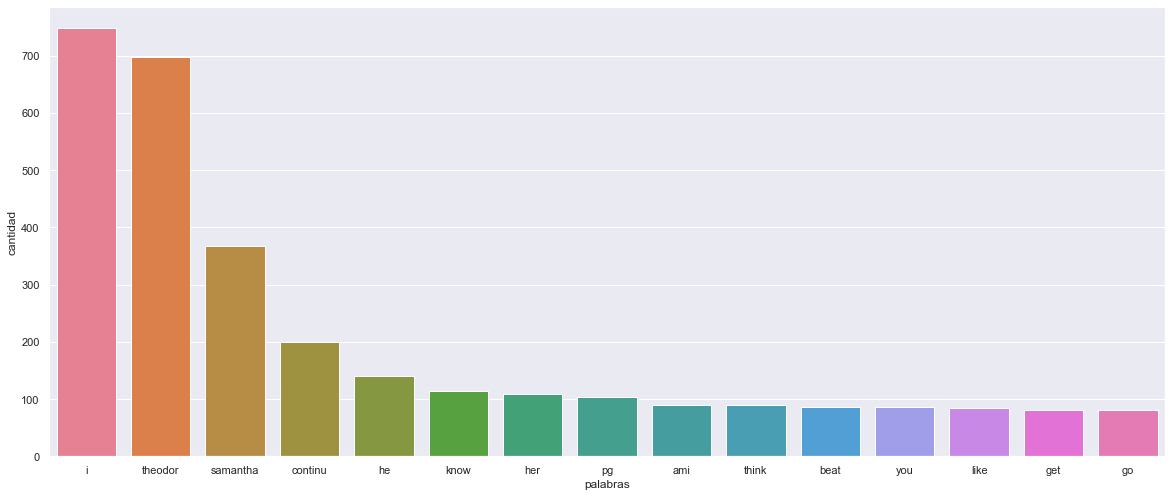

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.barplot(x = top10.palabras, y = top10.cantidad, data= top10, palette = 'husl')

In [6]:
# Vectorización 
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features)
#cou_vec=CountVectorizer(ngram_range=(2))#, ngram_range=(2)) # stop_words="english" , ngram_range=(1, 2)

In [7]:
matriz_titulos = cou_vec.fit_transform(alpha)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abil', 'abl', 'accept', 'across', 'act', 'actual', 'ad', 'address', 'ador', 'adventur', 'after', 'afternoon', 'age', 'ago', 'alan', 'alien', 'all', 'allow', 'almost', 'alon', 'along', 'alreadi', 'alright', 'also', 'alway', 'am', 'amaz', 'ami', 'an', 'and', 'angel', 'angri', 'anniversari', 'annoy', 'anoth', 'answer', 'anxiou', 'anybodi', 'anymor', 'anyon', 'anyth', 'anyway', 'anywher', 'apart', 'apolog', 'approach', 'are', 'area', 'argument', 'arm']


In [8]:
palabras_cant_optimizada.palabras

0
i                  i
theodor      theodor
samantha    samantha
continu      continu
he                he
              ...   
exit            exit
fall            fall
nervou        nervou
somebodi    somebodi
montag        montag
Name: palabras, Length: 429, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
#tfIdfTransformer
tfIdfTransformer = TfidfTransformer(use_idf=True)
countVectorizer = CountVectorizer()
wordCount = countVectorizer.fit_transform(alpha)
newTfIdf = tfIdfTransformer.fit_transform(wordCount)
transf = pd.DataFrame(newTfIdf[0].T.todense(), index=countVectorizer.get_feature_names(), columns=["TF-IDF"])
transf = transf.sort_values('TF-IDF', ascending=False)
transf.head(10)

,TF-IDF
her,1.0
abandon,0.0
process,0.0
prostitut,0.0
proselyt,0.0
prop,0.0
proofread,0.0
promenad,0.0
project,0.0
programm,0.0


In [11]:
alpha

['her',
 'written',
 'spike',
 'jonz',
 'int',
 'unknown',
 'space',
 'close',
 'theodor',
 'face',
 'we',
 'hold',
 'long',
 'time',
 'he',
 'look',
 'someth',
 'camera',
 'deep',
 'think',
 'he',
 'start',
 'quietli',
 'dictat',
 'love',
 'letter',
 'small',
 'microphon',
 'theodor',
 'to',
 'chri',
 'i',
 'think',
 'i',
 'could',
 'possibl',
 'tell',
 'much',
 'mean',
 'i',
 'rememb',
 'i',
 'first',
 'start',
 'fall',
 'love',
 'like',
 'last',
 'night',
 'ly',
 'nake',
 'besid',
 'tini',
 'apart',
 'suddenli',
 'hit',
 'i',
 'part',
 'whole',
 'larger',
 'thing',
 'like',
 'parent',
 'parent',
 'parent',
 'befor',
 'i',
 'live',
 'life',
 'like',
 'i',
 'know',
 'everyth',
 'suddenli',
 'bright',
 'light',
 'hit',
 'wake',
 'that',
 'light',
 'theodor',
 'search',
 'right',
 'word',
 'quietli',
 'enjoy',
 'write',
 'letter',
 'as',
 'continu',
 'move',
 'memori',
 'describ',
 'theodor',
 'cont',
 'i',
 'ca',
 'believ',
 'alreadi',
 'year',
 'sinc',
 'marri',
 'and',
 'still',
 'da

In [12]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(alpha)
vect = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
vect = vect.sort_values('TF-IDF', ascending=False)
vect.head(10)

,TF-IDF
her,1.0
abandon,0.0
process,0.0
prostitut,0.0
proselyt,0.0
prop,0.0
proofread,0.0
promenad,0.0
project,0.0
programm,0.0
